# Marketing analysis for ABC (Alias) management

### 1.	Introduction

### 1.1	Background

ABC management company owns an amusement park close to New York city and its main service is the park management. The park is planning to expand and attract more visitors from New York. Each year, there are large amount of both new and return visitors. They come from all different backgrounds. Some are young teenagers with friends, and some are parents with kids, etc. They all reflex different consuming behaviors as well. Therefore, the ABC management need market analysis on the New York consuming behaviors and also its own exiting customer in order to target different groups of visitors marketing pitch so that they can increase the park traffic and increase the park revenue. ABC management also needs a prediction on total spending by new York visitors in order to know its potential revenue and marketing budget as well. 

### 1.2	Problem 

ABC management company has a hypothesis that some recent analysis of the leisure preferences of people in the Greater New York City area indicates that they prefer short getaways to long vacations. If this hypothesis is true, that will draw more visitors from New York in a constant growth rate. ABC needs segments of its existing park visitors to create targeting campaign and marketing materials. Then the prediction of park revenue is needed to budget marketing spending.

### 1.3	Interest

The interest of this analysis is to understand the New York consumers that related to ABC park and also understand the park existing visitors so that marketing strategies can be created more accurately targeting different segments of customer. 



### 2.	Data acquisition and cleaning 

### 2.1 Data sources 

The data for analysis on new York consuming behavior can be found through new York open data. I downloaded the csv file and import to python. There are one file for basic new Yorkers’ household and leisure spending, and another file of information for new York visitors to new England park. The rest company data was provided by ABC company. 

### 2.2 Data cleaning 

Since the new York consuming data was downloaded from the an relative official website. The information in the database is very comprehensive and complete. I used the commend to check if the missing values and erase them. 

### 3.	Exploratory Data Analysis

### 3.1 stats summary on New York consumer 

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

Based on the summary over the new York consumer dataset, we found that median of household in new York contains 3 people that includes 1 kid and has adjusted gross income of $ 180436, the average spending on leisure annual is $7472 and the average spending on travelling nationwide is $4816. 

In [13]:
nyconsum = pd.read_csv('nycconsumers.csv')
nyconsum.head()

,householdID,state,county,householdpax,AGI,conusleisure,children,leisureavg
0,1,New York,Nassau,4,179883.69,7115.75,1,9193.40
1,2,New York,Nassau,2,169985.69,4967.27,1,7914.61
2,3,New York,Nassau,3,174330.05,3088.74,2,7885.29
3,4,New York,Nassau,5,192924.29,4841.22,2,5472.83
4,5,New York,Nassau,2,153443.55,5745.79,1,7859.36


In [14]:
nyconsum.isnull().sum()

householdID     0
state           0
county          0
householdpax    0
AGI             0
conusleisure    0
children        0
leisureavg      0
dtype: int64

In [15]:
nyconsum.groupby('children').describe()['leisureavg']

,count,mean,std,min,25%,50%,75%,max
children,,,,,,,,
0,1631.0,7480.211097,1181.512236,3772.02,6716.210,7453.930,8265.560,11531.30
1,2760.0,7449.148913,1215.420146,2570.00,6652.545,7428.765,8265.465,11509.60
2,1481.0,7502.292431,1215.243593,4054.74,6658.020,7485.730,8387.730,11288.49
3,126.0,7516.860476,1151.203111,5186.90,6750.500,7576.985,8231.975,10535.90
4,2.0,7482.650000,582.627703,7070.67,7276.660,7482.650,7688.640,7894.63


In [6]:
nyconsum.groupby('householdpax').describe()['leisureavg']

,count,mean,std,min,25%,50%,75%,max
householdpax,,,,,,,,
1,992.0,7449.119677,1189.618623,3772.02,6675.8150,7364.490,8265.2000,11236.48
2,1251.0,7455.519880,1194.916970,2570.00,6650.5600,7462.680,8283.7400,11509.60
3,1504.0,7477.271323,1207.755883,3767.07,6668.6675,7445.880,8307.8550,11288.49
4,1213.0,7481.946249,1213.659475,3701.28,6659.2200,7473.300,8280.3500,11531.30
5,710.0,7494.749775,1220.554515,3765.75,6683.9250,7501.075,8336.8050,10579.75
6,253.0,7507.911304,1194.375681,4401.23,6736.0900,7607.360,8349.3100,10136.40
7,68.0,7491.763382,1323.828211,4286.98,6645.5200,7292.060,8428.5575,10120.10
8,7.0,7081.695714,590.726099,6511.05,6686.4150,6920.240,7348.9750,8069.80
9,2.0,7637.735000,1744.821338,6403.96,7020.8475,7637.735,8254.6225,8871.51


The household with 1 or 2 kids will spending more travelling both leisure or nationwide. But household of 2 people (most likely they are married but no kids) spend more than household of 3 people that includes 1 kid on leisure trip. This fact confirms the hypothesis that married couples in the new York consumers group prefer leisure trip better than long distance vacation. 

We examined the annual spending on leisure travel, a histogram can help visualize the spending distribution:

Text(0.5, 1.0, 'Histogram of leisureavg')

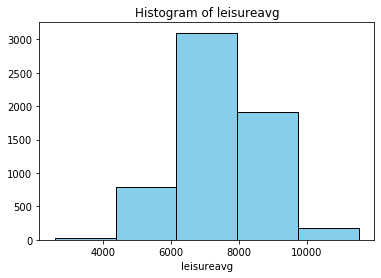

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.hist(nyconsum['leisureavg'],5,color="skyblue",ec = 'black')
plt.xlabel('leisureavg')
plt.title('Histogram of leisureavg')

We also tried to find relationships between geographic location and gross income to the leisure spending. The results for mean gross income per county and mean leisure travels spending per county are listed below by descending order:


In [8]:
nyconsum.groupby('county')['AGI'].mean().sort_values(ascending=False)

county
Westchester    202542.48515
Fairfield      191869.37832
Bergen         187061.47080
Morris         181537.75586
Hudson         178790.57408
New York       177136.37092
Nassau         176586.67408
Kings          176520.22080
Suffolk        175842.66726
Queens         165360.41478
Bronx          162137.82440
Passaic        153414.83836
Name: AGI, dtype: float64

In [9]:
nyconsum.groupby('county')['leisureavg'].mean().sort_values(ascending=False)

county
Passaic        7538.15932
Fairfield      7537.49430
Nassau         7526.01608
Suffolk        7505.84534
Bergen         7496.66408
Kings          7474.82102
Queens         7463.39362
Westchester    7453.86092
Morris         7447.50262
Hudson         7441.16172
Bronx          7426.38236
New York       7390.21844
Name: leisureavg, dtype: float64

We can identify the top 5 high income counties are: Westchester, Fairfield, Bergen, Morris and Hudson. However, the top 5 leisure spending counties are: Passaic, Fairfield, Nassau, Suffolk and Bergen. Among all, worth mentioned that Passaic seems to have the least gross income household, but they spend the most on leisure trips. 

Further to exam the relationship between gross income and leisure travel spending, and we found there is none linear relationship between those two aspects. The scatter plot is used to visualize if any correlation relationship existed:

Text(0.5, 1.0, 'Scatter Plot of income to leisure spending')

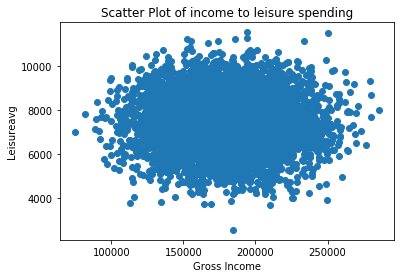

In [10]:
plt.scatter(nyconsum['AGI'],nyconsum['leisureavg'])
plt.xlabel('Gross Income')
plt.ylabel('Leisureavg')
plt.title('Scatter Plot of income to leisure spending')

### 3.2	Consumer segmentation with K-Means

In order to find the accurate cluster of audience to target marketing, we need to label all new york consumers to different clusters and make strategic marketing plans accordingly. There are many different clustering approaches. 3 main types of clustering include: Partitioned-based Clustering, Hierarchical Clustering, and Density-based Clustering. Here we use K-Means clustering on new York consumer dataset to reveal some insights for strategic marketing plans. 

### 3.21 K-Means preprocessing

k-means algorithm isn't directly applicable to categorical variables because Euclidean distance function isn't really meaningful for discrete variables. We dropped “state” and “county” columns from the dataset. We also dropped the “householdID” as well. Although this column is numerical presentation but it’s categorical variable for all individual rows. Then we normalize the entire dataset to get the cluster dataset. 
In order to find the best cluster number for this dataset, we used the elbow method to find out the most efficient cluster number as below:


In [16]:
df = nyconsum.drop(['state','county','householdID'],axis=1)
df.head()

,householdpax,AGI,conusleisure,children,leisureavg
0,4,179883.69,7115.75,1,9193.40
1,2,169985.69,4967.27,1,7914.61
2,3,174330.05,3088.74,2,7885.29
3,5,192924.29,4841.22,2,5472.83
4,2,153443.55,5745.79,1,7859.36


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
X = df.values
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.62920197, -0.01849355,  1.65941842, -0.02313513,  1.42893269],
       [-0.73763794, -0.34949596,  0.10916961, -0.02313513,  0.36732178],
       [-0.05421798, -0.20421473, -1.24629515,  1.26214963,  0.34298125],
       ...,
       [ 1.31262192,  1.24605639, -0.24479695,  1.26214963,  0.68733506],
       [ 0.62920197, -0.67810631,  0.73443403, -1.30841988,  1.44013996],
       [-0.73763794,  2.259714  , -0.79999828, -0.02313513,  0.27492405]])

In [20]:
sse2 = {}
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, random_state=688)
    kmeans.fit(Clus_dataSet)
    sse2[i] = kmeans.inertia_

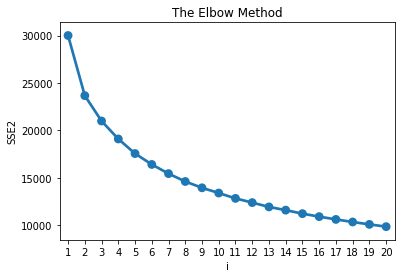

In [21]:
plt.title('The Elbow Method')
plt.xlabel('i')
plt.ylabel('SSE2')
sns.pointplot(x=list(sse2.keys()), y=list(sse2.values()))

Based on above elbow line that we generated from the dataset, we decided to use 4 cluster to segment our New York consumer dataset. 



### 3.22 K-Means Modeling

Before clustering, we will assume that the consumer group will have different attributes like gross income, family members, children etc. We feed the dataset to K-means clustering and get the cluster labels for 4 clusters as :0,1,2,3,4. Then we applied the label to the dataset and added another column “Clus_km”.

In [22]:
from sklearn.cluster import KMeans 
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 1 1 ... 3 1 3]


In [23]:
df["Clus_km"] = labels
df.head(5)

,householdpax,AGI,conusleisure,children,leisureavg,Clus_km
0,4,179883.69,7115.75,1,9193.40,0
1,2,169985.69,4967.27,1,7914.61,1
2,3,174330.05,3088.74,2,7885.29,1
3,5,192924.29,4841.22,2,5472.83,0
4,2,153443.55,5745.79,1,7859.36,1


### 3.23 K- means Model Insights

After we applied the label to the dataset, we group the dataset by the label to exam each variable’s mean to get some insights for each cluster of consumers.

In [24]:
df.groupby('Clus_km').mean()

,householdpax,AGI,conusleisure,children,leisureavg
Clus_km,,,,,
0,3.077647,192769.136325,4818.749238,1.018824,7461.307614
1,3.075203,165309.626082,4846.993780,1.007622,7484.638501
2,3.103371,133585.152494,4774.443775,1.038202,7432.588393
3,3.069813,224941.673874,4786.484140,1.018682,7505.220442


Cluster_km 0: This group of the consumer has the highest gross income and smallest household numbers. They have the highest leisure trip spending amount but not the nationwide travel spending. Young elite couples, white collars might represent this cluster well. They are busy at work and maybe they cannot take long time vacation to travel 


Cluster_km 1: This group of consumer has median gross income and least children number in the family. But they spend more on both leisure trip and long-distance travels. A family with love, middle class, maybe parents are teachers. So we label them as “mid love travel”


Cluster_km 2: This group of consumer has higher than median income but they spend more on long distance travels, 


Cluster_km 3: This group of consumer has lowest gross income and largest family members and also children numbers. Although they did not spend as much money on both types of travelling as the other groups, they still have the demand for leisure trips. Their limitations are family members, low incomes. So we label this group as “low income big family”


In [25]:
df.Clus_km.replace([0,1,2,3],[ 'high income frequent', 'mid love travel','mid income national','low income big family'], inplace=True)

After applying the labels to the dataset, we have the below conclusion table:

In [26]:
df.groupby('Clus_km').mean()

,householdpax,AGI,conusleisure,children,leisureavg
Clus_km,,,,,
high income frequent,3.077647,192769.136325,4818.749238,1.018824,7461.307614
low income big family,3.069813,224941.673874,4786.484140,1.018682,7505.220442
mid income national,3.103371,133585.152494,4774.443775,1.038202,7432.588393
mid love travel,3.075203,165309.626082,4846.993780,1.007622,7484.638501


It will be better to visualize those clusters of consumers distribution based on their attributes. So we feed the dataset to the 3D model as following:

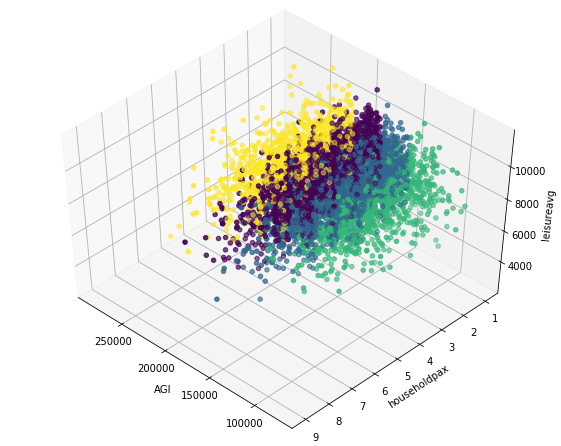

In [27]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

ax.set_xlabel('AGI')
ax.set_ylabel('householdpax')
ax.set_zlabel('leisureavg')

ax.scatter(X[:, 1], X[:, 0], X[:, 4], c= labels.astype(np.float))

From the above 3D model, we have gross income as the X-axis, household member number as the Y-axis and leisure trip spending as the Z-axis. It is clear to see all four clusters covering all ranges of new York consumers from the dataset. 

### 4.	Predictive Modeling

There are two types of the predictive modeling: Regression and classification. In this analysis, we built regression models to predict the total spending by new York consumers to our park for each of next five years and classification model to classify households as season passes renewer or non-season pass renewer. The information generated from those models will eventually help marketing department to budget their spending on the campaigns. 

### 4.1 Regression Model

Under regression models, we have linear regression and nonlinear regression. Before deciding which regression model we are going to build, first we plot the data points from the database “ny_to_ne”. Scatter plot is a great data visualization tool here to exam the data:

In [28]:
nyc_to_ne = pd.read_csv('nyc_to_ne.csv')
nyc_to_ne.head()

,year,summerspend
0,1959,2.262733e+07
1,1960,3.050980e+07
2,1961,2.440828e+07
3,1962,2.377221e+07
4,1963,2.357277e+07


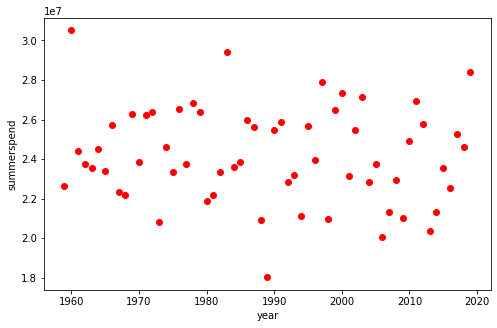

In [29]:
plt.figure(figsize=(8,5))
x_data, y_data = (nyc_to_ne["year"], nyc_to_ne["summerspend"])
plt.plot(x_data, y_data, 'ro')
plt.ylabel('summerspend')
plt.xlabel('year')
plt.show()

From the above scatter plot, we learned that linear regression is not suitable for this database. After carefully examine the data point trend, from all different types of nonlinear regressions: Quadratic, Exponential, logarithmic and sigmoidal/logistic. We decided to persuade with sigmoidal/logistic regression model. 
We normalized both year and summer spending variables for a new dataset. Then we use curve fit to fit our sigmoid function to that normalized dataset. Optimal values for the parameters so that the sum of the squared residuals of sigmoid(xdata, *popt) - ydata is minimized. Then we get the parameter for beta_1 as 0.00092502 and beta_2 as -1449.14472.


In [30]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

In [31]:
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [32]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata,maxfev=1000000)
popt[0],popt[1]

(0.0009250248275286691, -1449.1447196473946)

In order to visualize the sigmoid regression model that we built to the original dataset. A scatter plot with trend line has been built as below:

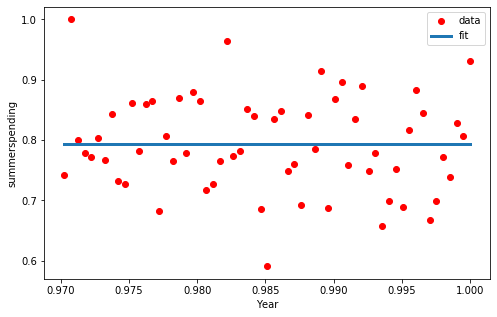

In [33]:
x = np.linspace(1959, 2019, 61)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('summerspending')
plt.xlabel('Year')
plt.show()

Then we use this sigmoid regression model to predict the next five years summer spending amount as below

In [34]:
pred_year = np.linspace(2020, 2025, 5)
pred_year_norm =pred_year / max(pred_year)
pred_spend = sigmoid(pred_year_norm , *popt) * max(y_data)
pred ={'Year':pred_year,'summerspending':pred_spend}
pred = pd.DataFrame(pred)
pred

,Year,summerspending
0,2020.00,2.418582e+07
1,2021.25,2.418582e+07
2,2022.50,2.418582e+07
3,2023.75,2.418583e+07
4,2025.00,2.418583e+07


This result might not be the most accurate amount, but this is very close to the distribution of the datapoint based on historical data. 



### 4.2 Classification Model

The classification model was built based on the historical existing customer log. The goal of this classification model is to predict if an existing member will renew his or her membership or not. Here I built all 4 popular classification models: KNN, decision tree, logistic regression and SVM. In the end, I compared the classification report and scores to pick the most accurate model for future usage.
Before modeling, first I cleaned the datasheet. Then I selected and extracted the attributes and dependent result that I wanted o built into the classification model. Then I converted the categorical features to numerical values. In the end I normalized the input dataset and finished the data preprocessing.



In [2]:
nychis = pd.read_csv('nyc_historical.csv')
nychis.head(10)

,householdID,visits,avgrides_perperson,avgmerch_perperson,avggoldzone_perperson,avgfood_perperson,goldzone_playersclub,own_car,homestate,FB_Like,renew
0,44,20,9.8,32.4,27.2,70.7,0,1,CT,1,1
1,57,20,11.7,71.8,40.8,1.6,0,1,CT,1,1
2,63,20,9.8,27.4,25.7,74.9,0,1,CT,1,1
3,159,17,2.2,1.5,91.1,28.9,1,1,CT,0,1
4,162,19,3.4,5.0,12.0,9.2,0,1,CT,0,1
5,165,19,2.2,37.5,18.4,76.3,1,1,CT,1,1
6,186,20,10.8,88.0,51.9,47.6,0,1,CT,1,1
7,199,20,8.3,23.8,90.1,50.0,0,1,CT,0,1
8,235,18,8.9,27.9,46.6,64.0,0,1,CT,0,1
9,249,18,11.9,8.8,170.2,11.6,0,1,CT,0,1


In [3]:
X = nychis[['visits', 'avgrides_perperson', 'avgmerch_perperson','avggoldzone_perperson', 'avgfood_perperson', 'goldzone_playersclub',
       'own_car','FB_Like']].values
y = nychis['renew'].values
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

### 4.21 Classification algorithm: K Nearest Neighbor (KNN)

KNN model uses K nearest data point to decide the predicting outcomes. At first we picked the K=4 to build the KNN model, and use accuracy check to plot the different K numbers to the accuracy score as below:

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k = 7
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)
print(metrics.accuracy_score(y_train, neigh.predict(X_train)),metrics.accuracy_score(y_test, yhat))

0.743359375 0.6828125


In [5]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
     
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.621875 , 0.565625 , 0.634375 , 0.6234375, 0.659375 , 0.6328125,
       0.6828125, 0.6515625, 0.68125  ])

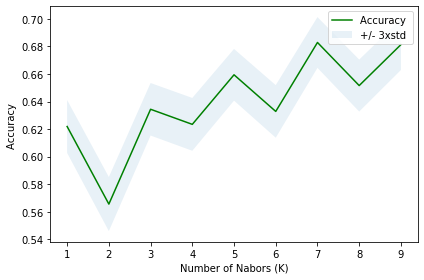

In [6]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

Based on the accuracy score plot, we decide to use K = 7 to get the most accuracy score for our KNN model. 
K-NN model yields accuracy score for training set as 0.76, and accuracy score for test score as 0.68



### 4.22 Classification algorithm: Decision Tree

When modeling the decision tree classification, I first create an instance of DecisionTreeClassfier called parkTree, and also we specify the selection criteria as “entropy”.

In [8]:
from sklearn.tree import DecisionTreeClassifier
parkTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
parkTree.fit(X_train,y_train)
predTree = parkTree.predict(X_test)
print(metrics.accuracy_score(y_train, parkTree.predict(X_train)),metrics.accuracy_score(y_test, predTree))

0.704296875 0.7109375


Decision tree model yields accuracy score for training set as 0.70, and accuracy score for test score as 0.71

### 4.23 Classification algorithm: Logistic Regression 

Normally logistic regression is used to predict the continuous values instead of binary results. The logistic regression package includes all different kinds of the numerical optimizers to find the best parameters.
I ran 5 different solvers ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ to compare the accuracy result. Except for “liblinear” solver, the rest solvers yield the exact same scores. 


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='saga').fit(X_train,y_train)
predLR= LR.predict(X_test)
print(metrics.accuracy_score(y_train, LR.predict(X_train)),metrics.accuracy_score(y_test, predLR))

0.690234375 0.7015625


In [10]:
prob_cls = LR.predict_proba(X_test)
prob_cls

array([[0.33995157, 0.66004843],
       [0.5589729 , 0.4410271 ],
       [0.39292739, 0.60707261],
       ...,
       [0.40266478, 0.59733522],
       [0.42293211, 0.57706789],
       [0.43748606, 0.56251394]])

Logistic Regression model yields accuracy score for training set as 0.69, and accuracy score for test score as 0.70, and log loss of 0.57
The evaluation of logistic regression model can be visualized via confusion matrix as below:


In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, predLR, labels=[1,0]))

[[390  33]
 [158  59]]


Confusion matrix, without normalization
[[390  33]
 [158  59]]


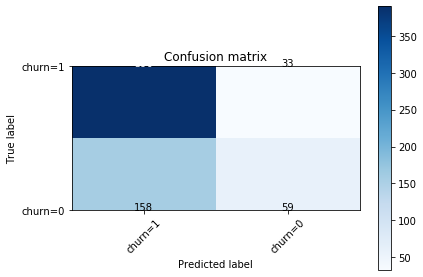

In [12]:
cnf_matrix = confusion_matrix(y_test, predLR, labels=[1,0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

The classification report as following:

In [13]:
print (classification_report(y_test, predLR))

              precision    recall  f1-score   support

           0       0.64      0.27      0.38       217
           1       0.71      0.92      0.80       423

    accuracy                           0.70       640
   macro avg       0.68      0.60      0.59       640
weighted avg       0.69      0.70      0.66       640



In [14]:
from sklearn.metrics import log_loss
log_loss(y_test, prob_cls)

0.5719972572219488

### 4.24 Classification algorithm: SVM

There are different kinds of kernel functions included in the SVM algorithm, and we decided to proceed with radical basis function for this classification model. SVM is more sophisticated and brought the dataset into higher dimensional levels to process.
SVM model yields accuracy score for training set as 0.80, and accuracy score for test score as 0.71.
The evaluation of SVM model can be visualized via confusion matrix as below:


In [15]:
from sklearn import svm
parksvm= svm.SVC(kernel='rbf')
parksvm.fit(X_train, y_train) 
predsvm = parksvm.predict(X_test)
print(metrics.accuracy_score(y_train, parksvm.predict(X_train)),metrics.accuracy_score(y_test, predsvm))

/Users/nico/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.704296875 0.7078125


Confusion matrix, without normalization
[[ 69 148]
 [ 39 384]]


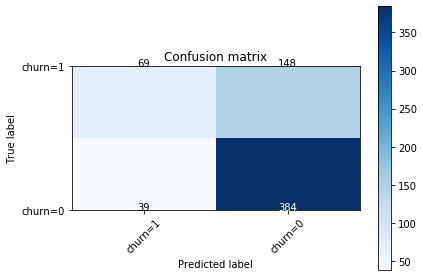

In [16]:
svm_matrix = confusion_matrix(y_test, predsvm, labels=[0,1])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(svm_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [17]:
print (classification_report(y_test, predsvm))



              precision    recall  f1-score   support

           0       0.64      0.32      0.42       217
           1       0.72      0.91      0.80       423

    accuracy                           0.71       640
   macro avg       0.68      0.61      0.61       640
weighted avg       0.69      0.71      0.68       640



### 4.3 Classification Models Evaluation

In [18]:
from sklearn.metrics import jaccard_similarity_score
print(jaccard_similarity_score(y_test, yhat),
     jaccard_similarity_score(y_test, predTree),
     jaccard_similarity_score(y_test, predLR),
     jaccard_similarity_score(y_test, predsvm))

0.68125 0.7109375 0.7015625 0.7078125


/Users/nico/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
/Users/nico/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
/Users/nico/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implem

In [19]:
from sklearn.metrics import f1_score
print(f1_score(y_test, yhat, average='weighted'),
     f1_score(y_test, predTree, average='weighted') ,
     f1_score(y_test, predLR, average='weighted') ,
     f1_score(y_test, predsvm, average='weighted') )

0.6620511049723756 0.6770891703942645 0.6604083448318385 0.6754894784534837


| Algorithm     | Jaccard       | F1    |
| ------------- |:-------------:| -----:|
| KNN           | 0.6828        |0.6675 |
| Decision Tree | 0.7109        | 0.677 |
| Logistic Regression |  0.7015 |0.6604 |
| SVM           |   0.7078      |0.6755 |

The Jaccard similarity index (sometimes called the Jaccard similarity coefficient) compares members for two sets to see which members are shared and which are distinct. The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. Based on the above performance, I will recommend decision tree model for future prediction on whether an existing member will renew the pass or not. 



### 5.	Conclusion

In this analysis, I analyze the new York consumer behavior to test and verify the hypothesis that  new York people prefer leisure trips more than long distance travelling and also cluster the consumers into different groups for marketing department to make strategic targeting plans. Then I built non-linear regression model to predict the next five years market size for marketing department to budget the campaign spending. In the end, I built classification models for predicting whether an existing member will renew his or her membership or not. Based on the performance on the different types of classification model, we highly recommend ABC management to implement the decision tree model for future predictions.